In [ ]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# <각 아이템 별 워드클라우드를 만들어보자>

from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re

review_table = pd.read_csv('/content/drive/MyDrive/review_gmarket_hairstyle.csv')

for i in range(1,21): # 각 아이템 별 워드클라우드를 가져온다.(1~20 > 헤어케어 / 21~40 > 헤어스타일링)
    data_table = review_table[review_table['PRODUCT_ID'] == i]
    review_list = list(data_table['REVIEW'])
    review_kwr = [normalize(review, english=True, number=True) for review in review_list]

    wordrank_extractor = KRWordRank(
        min_count = 3, # 단어의 최소 출현 빈도수 (그래프 생성 시)
        max_length = 8, # 단어의 최대 길이
        verbose = True
        )
    beta = 0.85   # PageRank의 decaying factor beta / defualt 0.85
    max_iter = 10

    keywords, rank, graph = wordrank_extractor.extract(review_kwr, beta, max_iter)

    word_dic_list = []
    for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
        word_dic = {word:float('%.3f'%r)}
        word_dic_list.append(word_dic)

    word_frequencies = {k: v for item in word_dic_list for k, v in item.items()}
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/malgun.ttf',width=400, height=400, scale=2.0, max_font_size=250)
    gen = wordcloud.generate_from_frequencies(word_frequencies)
    plt.figure()
    plt.imshow(gen,interpolation='bilinear')
    plt.axis('off')

scan vocabs ... 
num vocabs = 15523
done
scan vocabs ... 
num vocabs = 8091
done


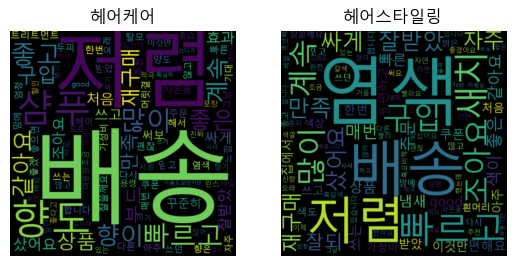

In [70]:
# <두가지 카테고리에서 각 카테고리 별 워드클라우드 생성 코드>

from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re
from krwordrank.word import summarize_with_keywords
from matplotlib import font_manager, rc

# plt에서 한글 폰트 사용하기 위한
font_paths = '/content/drive/MyDrive/malgun.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='Malgun Gothic')

review_table = pd.read_csv('/content/drive/MyDrive/review_gmarket_hairstyle.csv')

review_cat_1 = [] #1번 카테고리
review_cat_2 = [] #2번 카테고리

#헤어케어 카테고리
for i in range(1,21): # 상품의 갯수 만큼 워드클라우드를 가져온다.
    data_table = review_table[review_table['PRODUCT_ID'] == i]
    review_list = list(data_table['REVIEW'])
    for review in review_list:
        review_cat_1.append(normalize(review, english=True, number=True))

#헤어스타일링 카테고리
for i in range(21,41): # 상품의 갯수 만큼 워드클라우드를 가져온다.
    data_table = review_table[review_table['PRODUCT_ID'] == i]
    review_list = list(data_table['REVIEW'])
    for review in review_list:
        review_cat_2.append(normalize(review, english=True, number=True))

#불용어 처리
stopwords = {'좋아요','사용','머리','아직','좋네요','항상','너무','구매','제품', '정말', '가격','감사','있어','있어요','좋습니다'}

# KrWordRank
keywords_1 = summarize_with_keywords(review_cat_1, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)

keywords_2 = summarize_with_keywords(review_cat_2, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)

# =====워드클라우드=========
krwordrank_clouding_1 = WordCloud(
    font_path = font_paths,
    width = 600,
    height = 600,
)
krwordrank_clouding_2 = WordCloud(
    font_path = font_paths,
    width = 600,
    height = 600,
)

# 워드 클라우드에 적용
krwordrank_cloud_1 = krwordrank_clouding_1.generate_from_frequencies(keywords_1)
krwordrank_cloud_2 = krwordrank_clouding_2.generate_from_frequencies(keywords_2)

# 워드 클라우드 그리기
fig, axes = plt.subplots(1, 2)
# 첫 번째 이미지 표시
axes[0].imshow(krwordrank_cloud_1, interpolation="bilinear")
axes[0].axis('off')
axes[0].set_title("헤어케어")

# 두 번째 이미지 표시
axes[1].imshow(krwordrank_cloud_2, interpolation="bilinear")
axes[1].axis('off')
axes[1].set_title("헤어스타일링")

# 그림 표시
plt.show()

In [ ]:
same_dict = {} # 공통점을 담을 딕셔너리
diff_dict_care = {} # 헤어케어 특징
diff_dict_style = {} # 헤어스타일링 특징

# 각 카테고리별 특징 구하기
for key in keywords_1.keys():
    if key in keywords_2:
        # Sum the values from both dictionaries
        same_dict[key] = keywords_1[key] + keywords_2[key]

for key in keywords_1.keys():
    if key not in keywords_2:
        diff_dict_care[key] = keywords_1[key]

for key in keywords_2.keys():
    if key not in keywords_1:
        diff_dict_style[key] = keywords_2[key]

In [72]:
diff_dict_care = {} # 헤어케어 특징
diff_dict_style = {} # 헤어스타일링 특징

# 각 카테고리별 특징 구하기
for key in keywords_1.keys():
    if key not in keywords_2:
        diff_dict_care[key] = keywords_1[key]

for key in keywords_2.keys():
    if key not in keywords_1:
        diff_dict_style[key] = keywords_2[key]

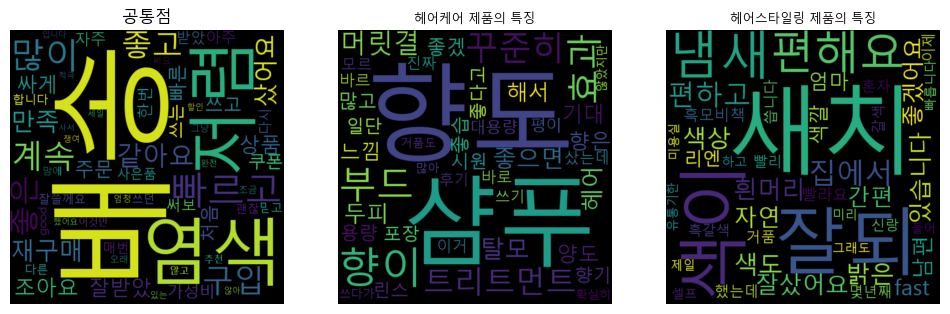

In [74]:
#공통점과 특징들을 워드 클라우드로
krwordrank_clouding_same = WordCloud(
    font_path = font_paths,
    width = 600,
    height = 600,
)
krwordrank_clouding_diff_care = WordCloud(
    font_path = font_paths,
    width = 600,
    height = 600,
)
krwordrank_clouding_diff_style = WordCloud(
    font_path = font_paths,
    width = 600,
    height = 600,
)

krwordrank_cloud_same = krwordrank_clouding_same.generate_from_frequencies(same_dict)
krwordrank_cloud_diff_care = krwordrank_clouding_diff_care.generate_from_frequencies(diff_dict_care)
krwordrank_cloud_diff_style = krwordrank_clouding_diff_style.generate_from_frequencies(diff_dict_style)

fig, axes = plt.subplots(1, 3,figsize=(12, 9))
# 첫 번째 이미지 표시
axes[0].imshow(krwordrank_cloud_same, interpolation="bilinear")
axes[0].axis('off')
axes[0].set_title("공통점")

# 두 번째 이미지 표시
axes[1].imshow(krwordrank_cloud_diff_care, interpolation="bilinear")
axes[1].axis('off')
axes[1].set_title("헤어케어 제품의 특징", fontsize=9)

# 세 번째 이미지 표시
axes[2].imshow(krwordrank_cloud_diff_style, interpolation="bilinear")
axes[2].axis('off')
axes[2].set_title("헤어스타일링 제품의 특징",fontsize=9)

# 그림 표시
plt.show()